<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 2  Part 2: Physical Data</u></b></p>

<div class="alert alert-block alert-warning">
<b>Looking at Fourier Transforms of Real Imaging Data:</b> <font color='black'>  

We have setup the microscrope according to your design from Lab 1. Place your resolution target on the stage. For these microscope experiments, use the “no filter” setting on the wheel. We will be concentrating on the star pattern target, though you will need to use the grid targets to measure pixel size and sampling frequency.
</font> 
</div>

<img src="StarSector.png" style="width:700px">

# Fourier transform of real data

<div class="alert alert-block alert-success">
<font color='black'> 1. Measure the Magnification of the system. What is the maginification and the object plane sampling frequency (samples/mm)?  </font><br/> 
</div>

In [4]:
# Import and instantiate all classes
from lighting import Lighting
from pololu import Pololu
from camera import Camera
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
l = Lighting()
m = Pololu()
c = Camera()
l.set_intensity(10)
c.open()
f_wheel,stage_y,stage_x,ap,stage_z = 1,2,3,4,5
m.set_position(ap, 2496, blocking = True) # wide aperture

Light control initialized successfully.
Servo control initialized successfully.
Load uc480 library..
ThorCam opened successfully.


(656.0, 706.0)

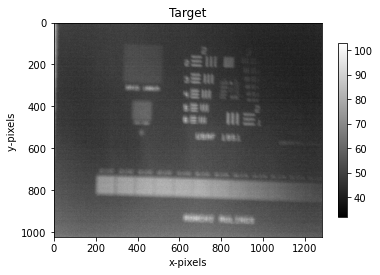

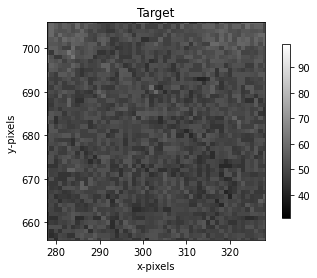

In [6]:
# computer: imaging-5
c.set_exposure(10)

m.set_position(stage_x,1800, blocking = True)
m.set_position(stage_z, 1700, blocking = True)
m.set_position(stage_y, 1225, blocking = True)

img = c.capture().copy()
x = plt.imshow(img, cmap = "gray")
plt.title("Target");
plt.xlabel("x-pixels");
plt.ylabel("y-pixels ");
plt.colorbar(x, shrink=0.8)
plt.savefig('Grid.png')  # save image
np.save("GridData", img)

plt.figure()
x = plt.imshow(c.capture().copy(), cmap = "gray")
plt.title("Target");
plt.xlabel("x-pixels");
plt.ylabel("y-pixels ");
plt.colorbar(x, shrink=0.8)
plt.xlim(278, 328)
plt.ylim(656, 706)


100 micrometers / 50 pixels = 2 micrometers per pixel 
5.3 micrometers per pixel / 2 micrometers per pixel 

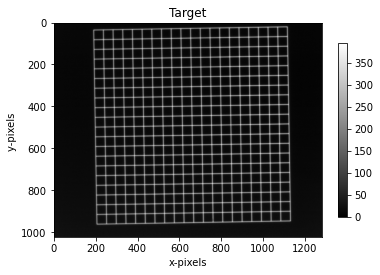

In [36]:
# computer: imaging-5
m.set_position(stage_x,1800, blocking = True)
m.set_position(stage_z, 1700, blocking = True)
m.set_position(stage_y, 1225, blocking = True)

x = plt.imshow(c.capture().copy(), cmap = "gray")
plt.title("Target");
plt.xlabel("x-pixels");
plt.ylabel("y-pixels ");

plt.colorbar(x, shrink=0.8)

(775.0, 700.0)

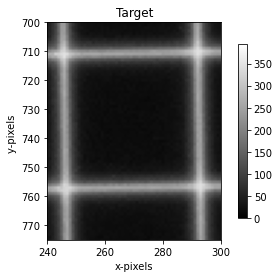

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
from IPython.display import display, clear_output
grid_img = np.load('GridData.npy')
x = plt.imshow(grid_img, cmap = "gray")
plt.title("Target");
plt.xlabel("x-pixels");
plt.ylabel("y-pixels ");

plt.colorbar(x, shrink=0.8)
plt.xlim(240, 300)
plt.ylim(775, 700)

After using the matplot interactive plotting widget, we found that the distance between two corners on a single block in the grid is 46 pixels. 
100 micrometers / 46 pixels = 2.17 micrometers per pixel 
Magnification = 5.3 micrometers per pixel / 2.17 micrometers per pixel = 2.44 X

<div class="alert alert-block alert-success">

<font color='black'> 2. Show an image and a <u>properly labeled</u> Fourier transform images side-by-side (e.g. using `plt.subplots(ncols=2)`, see Lab 0). <br/> Please display the base-10 logarithm of the magnitude of the Fourier transform.
</font>
</div>

In [7]:
from numpy.fft import fft2, fftshift, ifftshift
def fourier_transform_image(input_file, input_title, output_title):
    input_img = np.load(input_file)
    fig, ax = plt.subplots(ncols=2,figsize=(12,12))
    left = np.ravel(ax)[0].imshow(input_img,cmap='gray')
    plt.title(input_title)
    plt.xlabel("x-pixels")
    plt.ylabel("y-pixels")
    plt.colorbar(left,ax=np.ravel(ax)[0],shrink=0.5)
    Ffunc1 = fftshift(fft2(ifftshift(input_img)))
    right = np.ravel(ax)[1].imshow(np.log10(np.abs(Ffunc1)),cmap='gray')
    plt.title(output_title)
    plt.xlabel("x frequency (1 / mm)")
    plt.ylabel("y frequency (1 / mm)")
    plt.colorbar(left,ax=np.ravel(ax)[1],shrink=0.5)

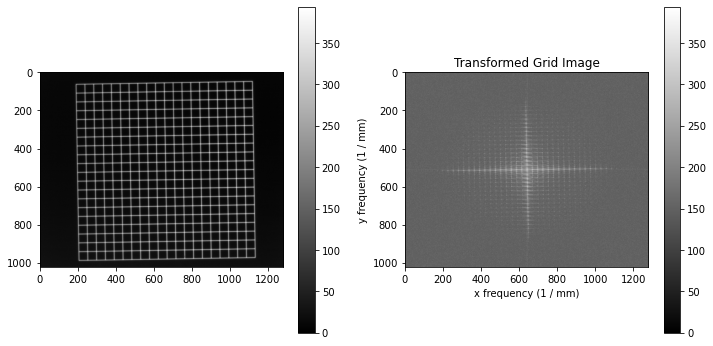

In [61]:
fourier_transform_image('GridData.npy', 'Grid Image', 'Transformed Grid Image')

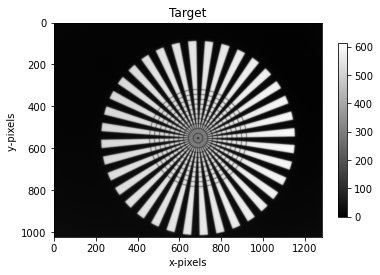

In [39]:
# computer: imaging-5
c.set_exposure(10)

m.set_position(stage_x, 1215, blocking = True)
m.set_position(stage_z, 1700, blocking = True)
m.set_position(stage_y, 1140, blocking = True)
img = c.capture().copy()
x = plt.imshow(img, cmap = "gray")
plt.title("Target");
plt.xlabel("x-pixels");
plt.ylabel("y-pixels ");
plt.colorbar(x, shrink=0.8)
np.save("StarData",img)
plt.savefig('Star.png')  # save image

<div class="alert alert-block alert-success">
<font color='black'> 3. Center your image on the star pattern (green cycle shown above) and show your image and Fourier transform pair. <br/> Place your image so that only the star pattern is in the field of view (no other targets, no text “STAR SECTOR 10D” visible) and try to get the best possible focus. Get a good exposure with wide-open aperture.
</font>
    
<font color='black'> Show the two images below and describe general features:
</font>
</div>

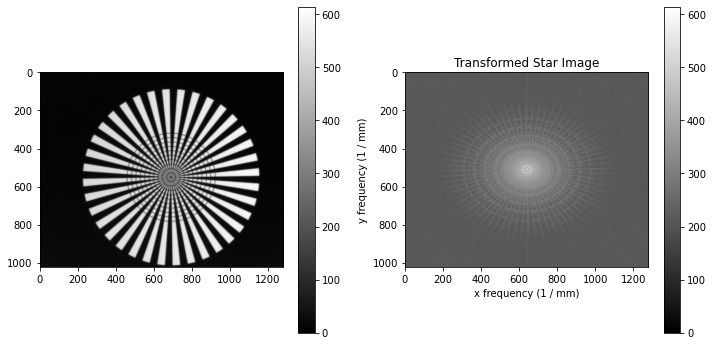

In [63]:
fourier_transform_image('StarData.npy', 'Star Image', 'Transformed Star Image')

# Effect of Defocus

<div class="alert alert-block alert-success">
    
<font color='black'> 4. Intentionally defocus your image. Capture another image-Fourier transform pair. <br/>
Show below and describe what you see (in particular, the changes from the focused image pair).
</font>

</div>

In [ ]:
# Code for capturing image
m.set_position(stage_z, 1000, blocking=True)
img = c.capture().copy()
plt.imshow(img, cmap='gray')
np.save("DefocusData", img)
plt.savefig("DefocusImg.png")

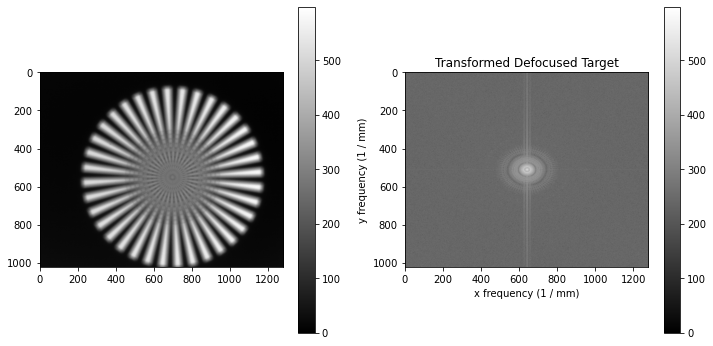

In [64]:
fourier_transform_image('DefocusData.npy', 'Defocused Target', 'Transformed Defocused Target')

<div class="alert alert-block alert-success">
    
<font color='black'> 5. <u> <i> Without changing focus (e.g. in the same defocused state) </u> </i>, shift your slide to the line pair targets and obtain an image (Fourier transform not required). <br/> Show a full-field and zoomed image of the finest line pairs that are still visible (e.g., not blurry).<br/><br/></font>
    
<font color='black'> What is the number of line-pairs/mm for this limiting visibility?   _________________
<br/>(The following table will help you find the lp/mm for each target.)</font>

</div>

<img src="LinePairTable.png" style="width:600px"> 
Values are in lp/mm.

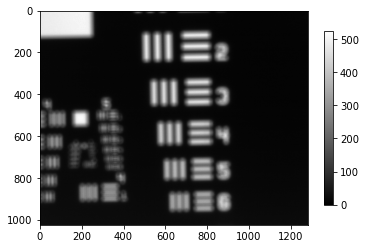

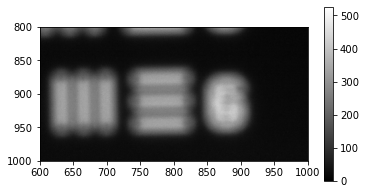

In [52]:
m.set_position(stage_x, 1400, blocking=True)
m.set_position(stage_y, 1300, blocking=True)
img = c.capture().copy()
x=plt.imshow(img, cmap='gray')
plt.colorbar(x, shrink=0.8)
plt.figure()
x=plt.imshow(img, cmap='gray')
plt.colorbar(x, shrink=0.8)
plt.xlim(600,1000)
plt.ylim(1000,800)
np.save("LinePairData", img)

<div class="alert alert-block alert-success">
    
<font color='black'> 6. Describe how the maximum visibility of line pairs compare with what you see in the Fourier transform of the defocused star pattern? <br/> (Hint: Consider the maximum frequency seen in the Fourier image.)  <br/>
</font>

</div>

<div class="alert alert-block alert-success">
    
<font color='black'> 7. Refocus your microscope and repeat the line pair test, showing maximum visibility (full-field and zoom), and describing the relationship between the star pattern Fourier image and maximum line pair visibility.  <br/>
</font>

</div>

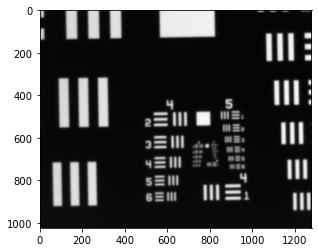

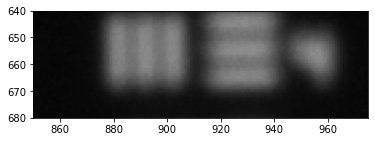

In [63]:
m.set_position(stage_z, 1500, blocking=True)
m.set_position(stage_x, 1500, blocking=True)
img = c.capture().copy()
x=plt.imshow(img, cmap='gray')
plt.figure()
x=plt.imshow(img, cmap='gray')
plt.xlim(850,975)
plt.ylim(680,640) # 5,4
np.save("FocusLPData", img)

# Effect of Aperture

<div class="alert alert-block alert-success">
    
<font color='black'> 8. Return to the star pattern target at best focus. Compare image-Fourier pairs for three aperture settings – as shown in the picture below. <br/> Show those pairs and describe what you see. <br/> 
Recall that the range limit of the aperture motor is different on every system. Experiment with your system to find out where the limits are. <br/> 
</font>

</div>

<img src="Lab2\aperture.png" style="width:900px"> 
Example aperture position: wide open (100% open), medium aperture (60% open), small aperture (30% open)

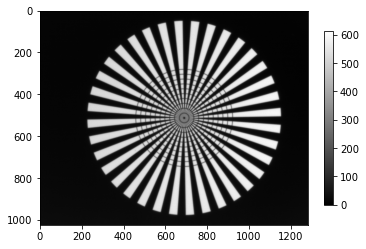

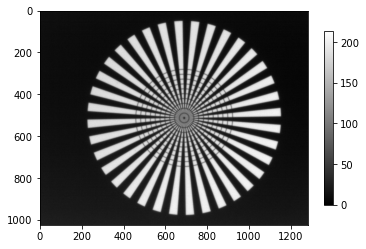

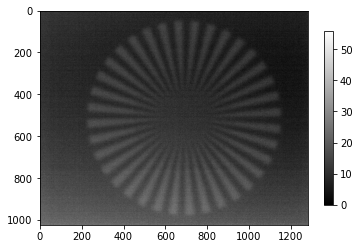

In [67]:
m.set_position(stage_x, 1215, blocking = True)
m.set_position(stage_z, 1700, blocking = True)
m.set_position(stage_y, 1140, blocking = True)
m.set_position(ap, 2496, blocking=True)
c.capture()
wide = c.capture().copy()
x = plt.imshow(wide, cmap = "gray")
np.save("WideAp", wide)
plt.colorbar(x, shrink=0.8)
plt.figure()
m.set_position(ap, 1500, blocking = True)
c.capture()
c.capture()
medium = c.capture().copy()
x = plt.imshow(medium, cmap = 'gray')
plt.colorbar(x, shrink=0.8)
np.save("MedAp", medium)
plt.figure()
m.set_position(ap, 550, blocking = True)
c.capture()
small = c.capture().copy()
x = plt.imshow(small, cmap = 'gray')
plt.colorbar(x, shrink=0.8)
np.save("SmallAp", small)


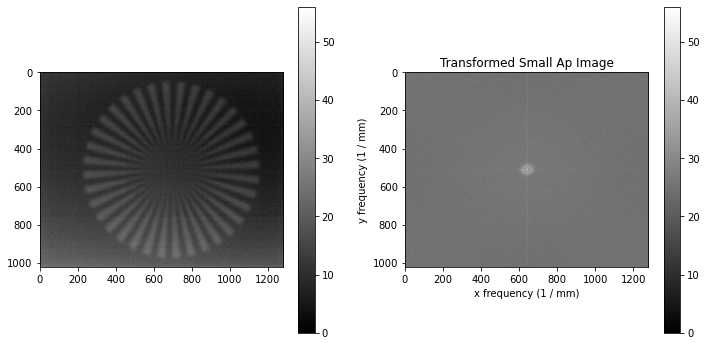

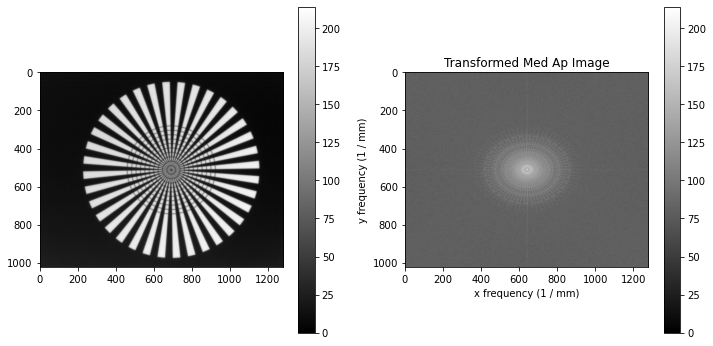

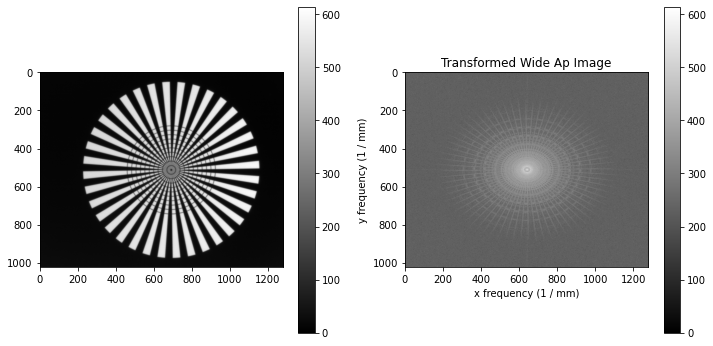

In [65]:
fourier_transform_image('SmallAp.npy', 'Small Ap Image', 'Transformed Small Ap Image')
fourier_transform_image('MedAp.npy', 'Med Ap Image', 'Transformed Med Ap Image')
fourier_transform_image('WideAp.npy', 'Wide Ap Image', 'Transformed Wide Ap Image')

In [23]:
# Shutdown
l.set_intensity(0)
l.close()
m.close()
c.close()

ThorCam closed successfully.


<div class="alert alert-block alert-warning">
<b>Set up a Low Magnification Imaging System:</b> <font color='black'>

Let’s consider a very low magnification imaging system. Using only the 1” and ½” optical tubes construct the system shown below. The 1” tube is connected to the lens and the ½” tube is connected to the camera. For all experiments below use Filter 1. Note that to obtain a good exposure level, you will probably need to maximize the brightness of the LED illuminator.
</font> 
</div>

<img src="Lab2\ConcentricCircle.png" style="width:900px"> 


# Low magnification system

<div class="alert alert-block alert-success">
<font color='black'> 9. Measure the Magnification of the system. What is the maginification and the object plane sampling frequency (samples/mm)?  </font><br/> 
</font>
</div>

In [ ]:
m.set_position(f_wheel, 1650, blocking = True)
m.set_position(stage_x, 1800, blocking = True)
m.set_position(stage_y, 1050, blocking = True)
m.set_position(stage_z, 1500, blocking = True)
img = c.capture().copy()
np.save('LowMagGrid', img)

In [ ]:
lowm = np.load('LowMagGrid.npy')
plt.figure()
x=plt.imshow(lowm, cmap='gray')
plt.colorbar(x, shrink=0.8)
plt.xlim(400, 600)
plt.ylim(500, 250)
%matplotlib widget
plt.figure()
x = plt.imshow(lowm, cmap='gray')
plt.colorbar(x, shrink=0.8)
plt.xlim(450, 500)
plt.ylim(450, 400)
pass

7.9 pixels = 100 micrometers
12.66 micrometers = 1 pixel
M = 5.3 um/pixel / 12.66 um/pixel = 0.42

<div class="alert alert-block alert-success">
<font color='black'> 10. Repeat the following data collection for three aperture settings.
</font>
</div>

<div class="alert alert-block alert-success">
    
<font color='black'> 11. Using the resolution target focus on the concentric ring. Obtain a zoomed image of the concentric rings only (no text below) and show both image-domain and frequency-domain images with proper axis labels <i> for each of the three aperture settings: </i> <br/>
</font>

</div>

In [2]:
ap_positions = [1000, 1500, 2000]

In [ ]:
for ap_pos in ap_positions:
    m.set_position(ap, ap_pos, blocking = True)
    c.capture()
    img = c.capture().copy()[1050:1275][475:680]
    np.save("ApImg" + str(ap_pos), img)

<ipython-input-11-5031c015fe74>:4: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(dt)


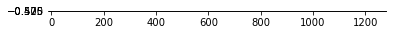

In [11]:
for ap_pos in ap_positions:
    dt = np.load("ApImg" + str(ap_pos) + ".npy")
    dt = dt[1050:1275][475:680]
    plt.imshow(dt)

In [21]:
y = np.asarray("Grid.png")
np.save("Y", y)
print(y)

Grid.png


<Figure size 432x288 with 0 Axes>

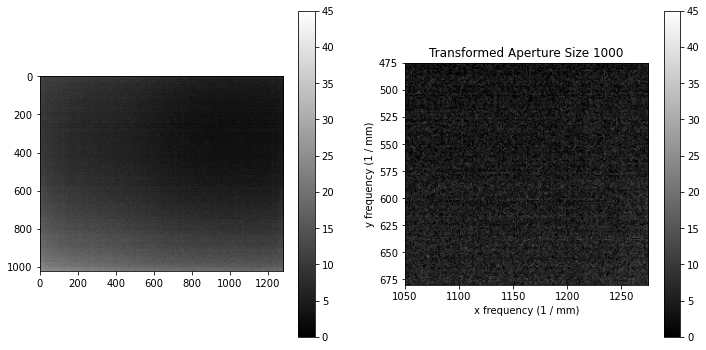

<Figure size 432x288 with 0 Axes>

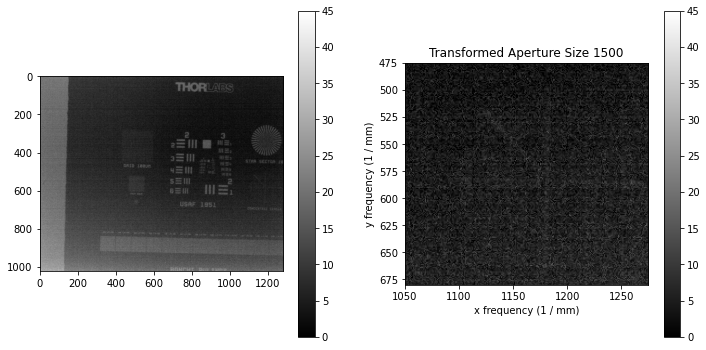

<Figure size 432x288 with 0 Axes>

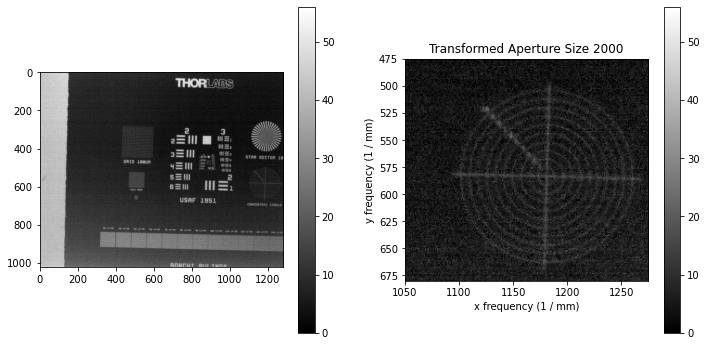

In [9]:
%matplotlib inline
for ap_pos in ap_positions:
    plt.figure()
    dt = np.load("ApImg" + str(ap_pos) + ".npy")
    fourier_transform_image("ApImg" + str(ap_pos) + ".npy", "Aperture Size " + str(ap_pos), 'Transformed Aperture Size ' + str(ap_pos))
    x=plt.imshow(dt, cmap='gray')
    plt.xlim(1050, 1275)
    plt.ylim(680, 475)

<div class="alert alert-block alert-success">
    
<font color='black'> 12. Explain what you are seeing in the three cases. <br/>
</font>

</div>